<h1><center>Naive Bayes & Gaussian Generative Model classifiers</center></h1>
<hr style="border:2px solid black"> </hr>

## Imports 

In [ ]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#unzip Data.zip

## Read Data

In [ ]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
def read_rgb(path,q,dimension):
    data =np.array([cv2.resize(plt.imread(path+str(i)+'.jpg'), (dimension,dimension), interpolation=cv2.INTER_AREA).reshape(-1) for i in range (0,q)])
    return data

def Read_Data(dimension):
    #----------------------------------------------------------------------------------------------------------
    train_air = read_rgb('Data/train/airplane/',5000,dimension)
    train_auto = read_rgb('Data/train/automobile/',5000,dimension)
    train_frog = read_rgb('Data/train/frog/',5000,dimension)
    #----------------------------------------------------------------------------------------------------------
    test_air = read_rgb('Data/test/airplane/',1000,dimension)
    test_auto = read_rgb('Data/test/automobile/',1000,dimension)
    test_frog = read_rgb('Data/test/frog/',1000,dimension)
    #----------------------------------------------------------------------------------------------------------

    X_train= np.concatenate((train_air,train_auto,train_frog),axis=0) /255
    y_train = np.concatenate((np.full((len(train_air),1),1),np.full((len(train_auto),1),2),np.full((len(train_frog),1),3)),axis=0)
    X_test = np.concatenate((test_air,test_auto,test_frog),axis=0) /255
    y_test = np.concatenate((np.full((len(test_air),1),1),np.full((len(test_auto),1),2),np.full((len(test_frog),1),3)),axis=0)

    print(X_train.shape, y_train.shape ,X_test.shape ,y_test.shape )
    
    return X_train , X_test 


<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [ ]:
def train_classifier_NB(target ,x_train):
    if(target == 1):
        X1 =x_train[:5000,:]
        m1 = np.mean(X1,axis=0)
        v1 = np.var(X1,axis=0)

    elif(target == 2):
        X1 =x_train[5000:10000,:]
        m1 = np.mean(X1,axis=0)
        v1 = np.var(X1,axis=0)

    else:
        X1=x_train[10000:15000,:]
        m1 = np.mean(X1,axis=0)
        v1 = np.var(X1,axis=0)
    

    return m1, v1

def Norm(val,mean,var):
    x=-((val-mean)**2.0)/(2.0*var)
    f=1.0/((2.0*np.pi*var)**(0.5))
    return f*np.exp(x)

def predict_NB(imgs,Y1,Y2,Y3):
    predictions =[]
    p1=[]
    p2=[]
    p3=[]
    i =0

    for i in range(0,len(imgs)):
        y_r1=Norm(imgs[i],Y1[0],Y1[1])
        y_r2=Norm(imgs[i],Y2[0],Y2[1])
        y_r3=Norm(imgs[i],Y3[0],Y3[1])
        t1 = np.product(y_r1)
        t2 = np.product(y_r2)
        t3 = np.product(y_r3)
        p1.append(t1)
        p2.append(t2)
        p3.append(t3)

        if(t1 == max(t1,t2,t3)):
            predictions.append(1)
        elif(t2 == max(t1,t2,t3)):
            predictions.append(2)
        else:
            predictions.append(3)
    
    return p1,p2,p3,predictions

def Calulate_ConfusionMatrix(predictions):
    ones_1 = (predictions[:1000]==).sum()
    twos_1 = (predictions[:1000]==np.full((1000),2)).sum()
    threes_1 = (predictions[:1000]==np.full((1000),3)).sum()

    ones_2 = (predictions[1000:2000]==np.ones(1000)).sum()
    twos_2 = (predictions[1000:2000]==np.full((1000),2)).sum()
    threes_2 = (predictions[1000:2000]==np.full((1000),3)).sum()

    ones_3 = (predictions[2000:3000]==np.ones(1000)).sum()
    twos_3 = (predictions[2000:3000]==np.full((1000),2)).sum()
    threes_3 = (predictions[2000:3000]==np.full((1000),3)).sum()

    ConfusionMatrix = np.array([[ones_1,twos_1,threes_1],[ones_2,twos_2,threes_2],[ones_3,twos_3,threes_3]])
    return ConfusionMatrix

def solve_NB(X_train,X_test): 
    Y1=train_classifier_NB(1,X_train)
    Y2=train_classifier_NB(2,X_train)
    Y3=train_classifier_NB(3,X_train)
    data=X_test
    p1,p2,p3,predictions= predict_NB(data,Y1,Y2,Y3)
    confusion_matrix = Calulate_ConfusionMatrix(predictions)
    return confusion_matrix,predictions,p1,p2,p3



In [ ]:
X_train,X_test =Read_Data(32)
confusion_matrix,predictions,p1,p2,p3 = solve_NB(X_train,X_test)

(15000, 3072) (15000, 1) (3000, 3072) (3000, 1)


C:\Users\RC\.conda\envs\vRing\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
confusion_matrix

array([[769, 134,  97],
       [324, 389, 287],
       [240, 139, 621]])

In [ ]:
confusion_matrices_nb += [confusion_matrix]


<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [ ]:
from matplotlib.cbook import STEP_LOOKUP_MAP
# Write code here
def train_classifier_GM(target ,x_train):
    if(target == 1):
        X1 =x_train[:5000,:]
        m1 = np.mean(X1,axis=0)

    elif(target == 2):
        X1 =x_train[5000:10000,:]
        m1 = np.mean(X1,axis=0)

    else:
        X1=x_train[10000:15000,:]
        m1 = np.mean(X1,axis=0)
    
    temp = X1-m1

    result = np.transpose(temp)@temp
    return m1, result


def predict_GM(imgs,Y1,Y2,Y3,covI):
    predictions =[]
    p1=[]
    p2=[]
    p3=[]
    i =0

    for i in range(0,len(imgs)):
        
        temp1 = imgs[i]-Y1[0]
        temp2 = imgs[i]-Y2[0]
        temp3 = imgs[i]-Y3[0]

        stemp1=temp1@covI@np.transpose(temp1)
        stemp2=temp2@covI@np.transpose(temp2)
        stemp3=temp3@covI@np.transpose(temp3)

        t1=np.exp(-0.5*stemp1)
        t2=np.exp(-0.5*stemp2)
        t3=np.exp(-0.5*stemp3)

        p1.append(t1)
        p2.append(t2)
        p3.append(t3)

        if(t1 == max(t1,t2,t3)):
            predictions.append(1)
        elif(t2 == max(t1,t2,t3)):
            predictions.append(2)
        else:
            predictions.append(3)
    
    return p1,p2,p3,predictions


    
def solve_GM(X_train,X_test): 
    Y1=train_classifier_GM(1,X_train)
    Y2=train_classifier_GM(2,X_train)
    Y3=train_classifier_GM(3,X_train)
    cov = ((1/3)*Y1[1])+((1/3)*Y2[1])+((1/3)*Y3[1])
    covI = np.linalg.pinv(cov)
    data=X_test
    p1,p2,p3,predictions= predict_GM(data,Y1,Y2,Y3,covI)
    confusion_matrix = Calulate_ConfusionMatrix(predictions)
    return confusion_matrix,predictions,p1,p2,p3


In [ ]:
        
        covI = np.linalg.pinv((1/3)*X1-m1)+((1/3)*Y2[1])+((1/3)*Y3[1])
        
        temp1 = imgs[i]-Y1[0]
        stemp1=temp1@covI@np.transpose(temp1)
        stemp2=temp2@covI@np.transpose(temp2)
        stemp3=temp3@covI@np.transpose(temp3)

        t1=np.exp(-0.5*stemp1)
        t2=np.exp(-0.5*stemp2)
        t3=np.exp(-0.5*stemp3)

In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_GM(X_train,X_test)

In [ ]:
confusion_matrix

array([[769, 127, 104],
       [192, 672, 136],
       [ 83, 126, 791]])

In [ ]:
confusion_matrices_gm += [confusion_matrix]


<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

Gaussian for 16x16:


In [ ]:
X_train,X_test =Read_Data(16)

(15000, 768) (15000, 1) (3000, 768) (3000, 1)


In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_NB(X_train,X_test)
confusion_matrices_nb += [confusion_matrix]


In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_GM(X_train,X_test)
confusion_matrices_gm += [confusion_matrix]


In [ ]:
X_train,X_test =Read_Data(8)

(15000, 192) (15000, 1) (3000, 192) (3000, 1)


In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_NB(X_train,X_test)
confusion_matrices_nb += [confusion_matrix]

In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_GM(X_train,X_test)
confusion_matrices_gm += [confusion_matrix]

In [ ]:
X_train,X_test =Read_Data(4)


(15000, 48) (15000, 1) (3000, 48) (3000, 1)


In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_NB(X_train,X_test)
confusion_matrices_nb += [confusion_matrix]

In [ ]:
confusion_matrix,predictions,p1,p2,p3 = solve_GM(X_train,X_test)
confusion_matrices_gm += [confusion_matrix]

In [ ]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


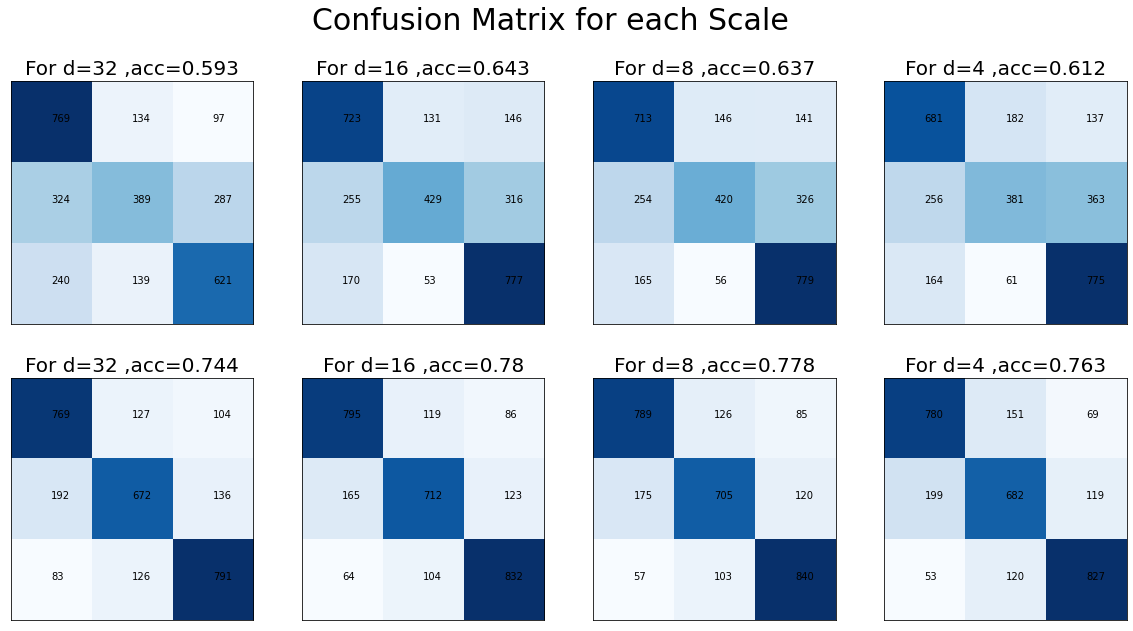

In [ ]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

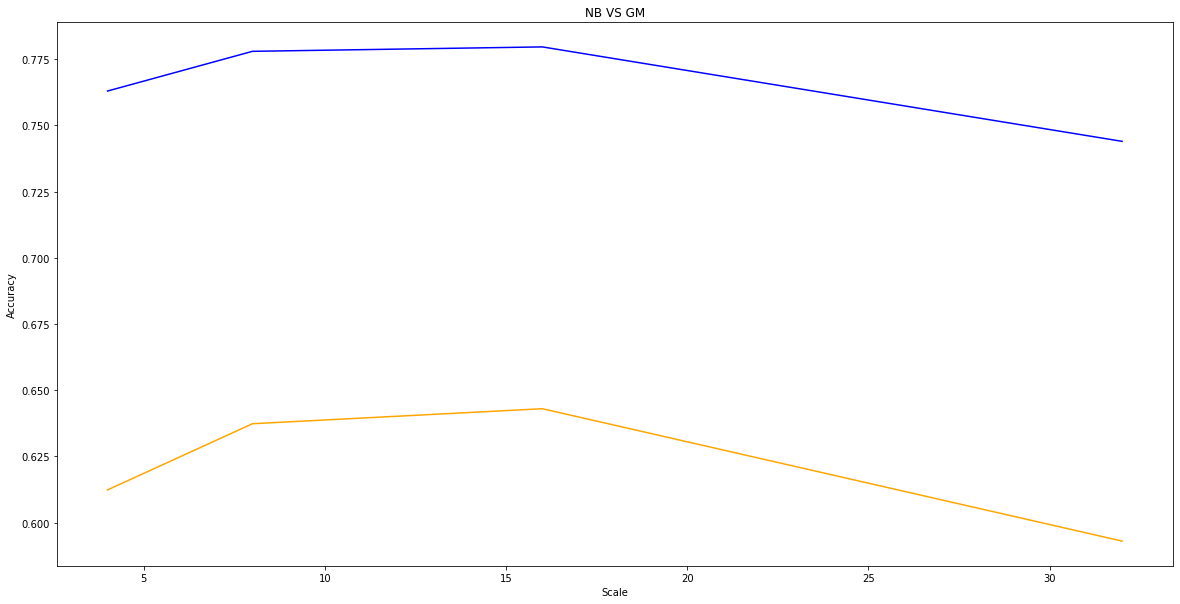

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##
### 
Gaussian Generative Model classifier got 10% accuracy Higher than Naive Bayes. GM Classifier is better in this case.

That's because the some of the pixels of the three entities is some how dependent on each other.

Therefore it violate the features independency assumption of the naive bayes classifier.
###